# PUI Fall 2017 HW 4-4
## Yuwen Chang (ywc249)
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night, and
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different, with 3 tests:
    
    1) KS,
    
    2) Pearson's, and
    
    3) Spearman's. 

In [1]:
# imports and setups
import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as st
import os
%pylab inline

# imports downloader
from getCitiBikeCSV import getCitiBikeCSV

Populating the interactive namespace from numpy and matplotlib


## Read in data

### Data used: Autumn 2015 (Sep., Oct., Nov.)

In [2]:
# Read data
df = pd.read_csv(os.getenv("PUIDATA") + "/" + '201509' + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + '201510' + '-citibike-tripdata.csv')
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + '201511' + '-citibike-tripdata.csv')

In [3]:
# This step is taking much time

# Append all data to a single dataframe
#df = pd.concat([dfa, dfb, dfc])
#df['date'] = pd.to_datetime(df['starttime'])

# With append method
df.append(df2, ignore_index=True)
df.append(df3, ignore_index=True)
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,288,9/1/2015 00:00:00,9/1/2015 00:04:48,263,Elizabeth St & Hester St,40.717290,-73.996375,307,Canal St & Rutgers St,40.714275,-73.989900,15479,Subscriber,1989.0,1,2015-09-01 00:00:00
1,165,9/1/2015 00:00:00,9/1/2015 00:02:45,495,W 47 St & 10 Ave,40.762699,-73.993012,449,W 52 St & 9 Ave,40.764618,-73.987895,23899,Subscriber,1987.0,1,2015-09-01 00:00:00
2,367,9/1/2015 00:00:01,9/1/2015 00:06:08,3119,Vernon Blvd & 50 Ave,40.742327,-73.954117,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,23921,Customer,NaN,0,2015-09-01 00:00:01
3,926,9/1/2015 00:00:07,9/1/2015 00:15:34,536,1 Ave & E 30 St,40.741444,-73.975361,340,Madison St & Clinton St,40.712690,-73.987763,23256,Subscriber,1992.0,1,2015-09-01 00:00:07
4,658,9/1/2015 00:00:09,9/1/2015 00:11:07,347,Greenwich St & W Houston St,40.728846,-74.008591,483,E 12 St & 3 Ave,40.732233,-73.988900,17289,Subscriber,1976.0,1,2015-09-01 00:00:09


In [4]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# Test 1: trip duration of bikers that ride during the day vs night
## Split by category

### I am splitting data by time (6am - 6pm; 6pm - 6am) and looking at the duration of riders:
### $H_0$: there is no statistical difference in the duration distribution of daytime and nighttime riders
### $\alpha = 0.05$

In [5]:
# Split by day and night according to my definition
df['tDay'] = df['tripduration'] \
            [(df['usertype'] == 'Subscriber') & (df['date'].dt.hour >= 6) & (df['date'].dt.hour < 18)]

df['tNight'] = df['tripduration'] \
            [(df['usertype'] == 'Subscriber') & (df['date'].dt.hour < 6) | (df['date'].dt.hour >= 18)]

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,tDay,tNight
0,288,9/1/2015 00:00:00,9/1/2015 00:04:48,263,Elizabeth St & Hester St,40.717290,-73.996375,307,Canal St & Rutgers St,40.714275,-73.989900,15479,Subscriber,1989.0,1,2015-09-01 00:00:00,NaN,288.0
1,165,9/1/2015 00:00:00,9/1/2015 00:02:45,495,W 47 St & 10 Ave,40.762699,-73.993012,449,W 52 St & 9 Ave,40.764618,-73.987895,23899,Subscriber,1987.0,1,2015-09-01 00:00:00,NaN,165.0
2,367,9/1/2015 00:00:01,9/1/2015 00:06:08,3119,Vernon Blvd & 50 Ave,40.742327,-73.954117,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,23921,Customer,NaN,0,2015-09-01 00:00:01,NaN,NaN
3,926,9/1/2015 00:00:07,9/1/2015 00:15:34,536,1 Ave & E 30 St,40.741444,-73.975361,340,Madison St & Clinton St,40.712690,-73.987763,23256,Subscriber,1992.0,1,2015-09-01 00:00:07,NaN,926.0
4,658,9/1/2015 00:00:09,9/1/2015 00:11:07,347,Greenwich St & W Houston St,40.728846,-74.008591,483,E 12 St & 3 Ave,40.732233,-73.988900,17289,Subscriber,1976.0,1,2015-09-01 00:00:09,NaN,658.0


In [6]:
#drop unnecessary columns
df1 = df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
               'start station name', 'start station latitude',
               'start station longitude', 'end station id', 'end station name',
               'end station latitude', 'end station longitude', 'bikeid', 'usertype',
               'birth year', 'gender', 'date'], axis=1)
df1.head()

,tDay,tNight
0,NaN,288.0
1,NaN,165.0
2,NaN,NaN
3,NaN,926.0
4,NaN,658.0


In [7]:
df1.describe()

,tDay,tNight
count,7.425670e+05,3.853050e+05
mean,8.620074e+02,1.007507e+03
std,4.113963e+03,5.550055e+03
min,6.000000e+01,6.000000e+01
25%,3.790000e+02,4.020000e+02
50%,5.980000e+02,6.590000e+02
75%,9.670000e+02,1.088000e+03
max,1.202099e+06,1.355067e+06


In [8]:
# Examine NaN values before dropping them
# remember: we have excluded non-subscribers, therefore, # of NaNs may be large
daynull = df1.tDay.isnull()
nightnull = df1.tNight.isnull()
pctnull = len(df1[daynull & nightnull]) / len(df1) * 100
print('NOTICE: %.2f%% of the data have no trip duration in the df now'%(pctnull))

NOTICE: 12.55% of the data have no trip duration in the df now


In [9]:
# dropping trip data without trip duration (NaN values for both day and night)
df1.dropna(how='all', inplace=True)
df1.head()

,tDay,tNight
0,NaN,288.0
1,NaN,165.0
3,NaN,926.0
4,NaN,658.0
5,NaN,392.0


## Plotting distributions

In [10]:
# Examine the tail
#longtrips = list(df[df.tDay > 14400]['tripduration'].values)
#len(longtrips) / df.sum()
#pl.hist(longtrips) #trips > 4 hours

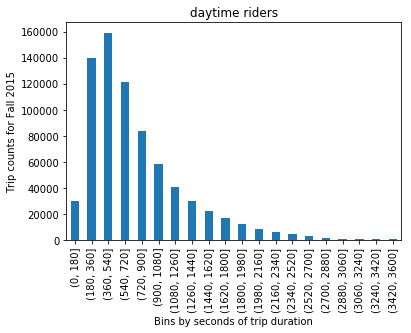

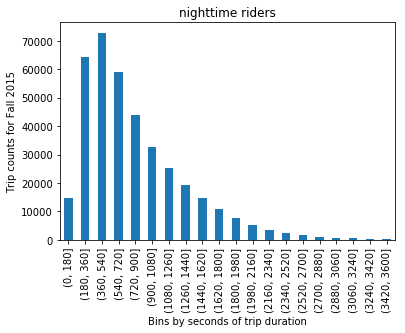

In [11]:
# Plot probability distributions
bins = np.arange(0, 3601, 180)

axD = df1.tDay.groupby(pd.cut(df1.tDay, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axD.set_title("daytime riders")
axD.set_xlabel("Bins by seconds of trip duration")
axD.set_ylabel("Trip counts for Fall 2015")

axN = df1.tNight.groupby(pd.cut(df1.tNight, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
axN.set_title("nighttime riders")
axN.set_xlabel("Bins by seconds of trip duration")
axN.set_ylabel("Trip counts for Fall 2015")

# Prof. FB: this is a VERY USEFUL syntax for you to knonw!

### Figure 1: histogrammed distribution of riders' trip durations by daytime/nighttime
The histograms are cut into 3-minute bins for trips under an hour. Due to the free time limit, most bike trips seem to end before 45 minutes. Also, two distributions both look something like a chi-square distribution.

              count_nonzero
tDay                       
(0, 180]           0.001659
(180, 360]         0.021899
(360, 540]         0.046776
(540, 720]         0.056410
(720, 900]         0.054150
(900, 1080]        0.046942
(1080, 1260]       0.036034
(1260, 1440]       0.025923
(1440, 1620]       0.017893
(1620, 1800]       0.011415
(1800, 1980]       0.007314
(1980, 2160]       0.005245
(2160, 2340]       0.003937
(2340, 2520]       0.003135
(2520, 2700]       0.002278
(2700, 2880]       0.001695
(2880, 3060]       0.001115
(3060, 3240]       0.000682
(3240, 3420]       0.000381
(3420, 3600]       0.000000


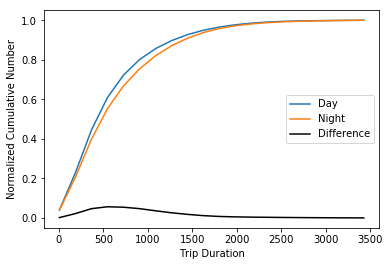

In [12]:
# Plot cumulative distributions
#print df.tS, df.tS.cumsum()

csD = df1.tDay.groupby(pd.cut(df1.tDay, bins)).agg([count_nonzero]).cumsum()
csN = df1.tNight.groupby(pd.cut(df1.tNight, bins)).agg([count_nonzero]).cumsum()

print(np.abs(csD / csD.max() - csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csD / csD.max() - csN / csN.max())**2, 'k-', label = "Difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### Figure 2: the cumulative distribution of CitiBike riders' trip durations by trip start time
There seems to be only a slight difference between the two cumulative distributions. The biggest gap is somewhere around 5.5%.

## KS test

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

> This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

> If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

> **Returns: KS statistic, two-tailed p-value**

In [13]:
# Conduct KS test
ks = st.ks_2samp(df1.tDay, df1.tNight)
print(ks)

Ks_2sampResult(statistic=0.31699519094365319, pvalue=0.0)


## Discussion
### Null Hypothesis: The trip duration distributions between daytime and nighttime are the same.
### Significance Level: $\alpha = 0.05$
### Test Outputs: KS statistic = 0.317 and the p-value = 0.0
### Result: We rejected the null hypothesis since the p-value is less than 0.05.
That means, despite looking somewhat similar on the graph, the trip duration patterns in daytime and nighttime are actually not the same.

## Repeat KS test with a subset 200 times smaller

In [14]:
# Subset 1 observation per 200
df2 = df1[df1.index % 200 == 0]
df2.describe()

,tDay,tNight
count,3706.000000,1930.000000
mean,812.924717,1085.505181
std,1596.348482,4825.351063
min,60.000000,60.000000
25%,378.000000,413.250000
50%,596.000000,690.000000
75%,973.000000,1106.750000
max,70477.000000,175144.000000


In [15]:
# Conduct second KS test with smaller size data
ks2 = st.ks_2samp(df2.tDay, df2.tNight)
print(ks2)

Ks_2sampResult(statistic=0.31635911994322213, pvalue=1.5897239146847436e-246)


## Discussion
### Null Hypothesis: The trip duration distributions between daytime and nighttime are the same.
### Significance Level: $\alpha = 0.05$
### Test Outputs: KS statistic = 0.316 and the p-value = 0.0... (different, but still small)
### Result: We rejected the null hypothesis since the p-value is less than 0.05.
Even with smaller sample sizes, we still infer that the trip duration patterns in daytime and nighttime are actually not the same.

## Subsampling
Downsize daytime trip data to the size of nighttime data in order to pair up for the correlation test.

In [16]:
# Do simple sampling without replacement (I don't want the same trip twice in my sample)
# Remove null cells in the process
np.random.seed(1000)
tDay2 = np.random.choice(df1['tDay'].dropna(), size=df1['tNight'].count(), replace=False)

df3 = pd.DataFrame(data=[tDay2, df1['tNight'].dropna()]).T
df3.head()

,0,1
0,2130.0,288.0
1,332.0,165.0
2,1819.0,926.0
3,430.0,658.0
4,464.0,392.0


In [17]:
# Rename columns and make sure observation sizes are paired up
df3.columns = ['tDay', 'tNight']
df3.describe()

,tDay,tNight
count,3.853050e+05,3.853050e+05
mean,8.535102e+02,1.007507e+03
std,3.806890e+03,5.550055e+03
min,6.000000e+01,6.000000e+01
25%,3.790000e+02,4.020000e+02
50%,5.980000e+02,6.590000e+02
75%,9.660000e+02,1.088000e+03
max,1.147025e+06,1.355067e+06


In [18]:
# Sort ascendingly
df3 = df3.apply(lambda x: x.sort_values().values)
df3.head()

,tDay,tNight
0,60.0,60.0
1,60.0,60.0
2,60.0,60.0
3,60.0,60.0
4,60.0,60.0


## Pearson's test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

### Pearson's is a pairwise test, the samples need to be:

**1. paired**

**2. sorted**

> Test for non-correlation.

> The Pearson correlation coefficient measures the linear relationship between two datasets. $r$ varies between -1 and +1 with 0 implying no correlation.

> The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

> **Returns: Pearson’s correlation coefficient, two-tailed p-value**

In [19]:
# Conduct Pearson's test
pr = st.pearsonr(df3.tDay, df3.tNight)
print(pr)

(0.97663769568276448, 0.0)


## Discussion
### Null Hypothesis: There is no correlation between daytime trip duration and nighttime trip duration ($\rho = 0$)

That is, in our context, the null hypothesis to be tested is that the distributions are not similar at all.

Since I have sorted the durations in ascending order, the **alternative** is that:

Literally, longer daytime trips are correlated with longer nighttime trips.

In our context, that means if we have a $\rho = 1$, the distributions overlap each other perfectly.

### Significance Level: $\alpha = 0.05$
### Test Outputs: Pearson's corr. coef. = 0.977 and the p-value = 0.0
### Result: We rejected the null hypothesis since the p-value is less than 0.05.

The inference we have is that it is very unlikely the two distributions have no correlations. In other words, they are actually pretty identical with a corr. coef. of nearly 1.

## Spearman's test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

> Test for non-correlation.

> **Returns: Spearman correlation matrix/coefficient, two-tailed p-value**

In [20]:
# Conduct Spearman's test
sr = st.spearmanr(df3.tDay, df3.tNight)
print(sr)

SpearmanrResult(correlation=0.99999934818002356, pvalue=0.0)


## Discussion
### Null Hypothesis: There is no correlation between daytime trip duration and nighttime trip duration ($\rho = 0$)

That is, in our context, the null hypothesis to be tested is that the distributions are not similar at all.

Since I have sorted the durations in ascending order, the **alternative** is that:

Literally, longer daytime trips are correlated with longer nighttime trips.

In our context, that means if we have a $\rho = 1$, the distributions overlap each other perfectly.

### Significance Level: $\alpha = 0.05$
### Test Outputs: Spearman's corr. coef. = 1 (0.999...) and the p-value = 0.0
### Result: We rejected the null hypothesis since the p-value is less than 0.05.

The inference we have is that it is very unlikely the two distributions have no correlations. In other words, they are actually pretty identical with a corr. coef. of nearly 1. Note that Spearman's test seems to be less strict in reaching corr. coef. of 1.

# Test 2: age of bikers for trips originating in Manhattan and in Brooklyn
## Split by category

### I am splitting data by location (Manhattan, Brooklyn) and looking at the age of riders:
### $H_0$: there is no statistical difference in the age distribution of riders that originate in Manhattan and in Brooklyn
### $\alpha = 0.05$

## Read in data

### Data used: Autumn 2015 (Sep., Oct., Nov.)

In [21]:
# Use the same data set and the df read in at the beginning
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,tDay,tNight
0,288,9/1/2015 00:00:00,9/1/2015 00:04:48,263,Elizabeth St & Hester St,40.717290,-73.996375,307,Canal St & Rutgers St,40.714275,-73.989900,15479,Subscriber,1989.0,1,2015-09-01 00:00:00,NaN,288.0
1,165,9/1/2015 00:00:00,9/1/2015 00:02:45,495,W 47 St & 10 Ave,40.762699,-73.993012,449,W 52 St & 9 Ave,40.764618,-73.987895,23899,Subscriber,1987.0,1,2015-09-01 00:00:00,NaN,165.0
2,367,9/1/2015 00:00:01,9/1/2015 00:06:08,3119,Vernon Blvd & 50 Ave,40.742327,-73.954117,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,23921,Customer,NaN,0,2015-09-01 00:00:01,NaN,NaN
3,926,9/1/2015 00:00:07,9/1/2015 00:15:34,536,1 Ave & E 30 St,40.741444,-73.975361,340,Madison St & Clinton St,40.712690,-73.987763,23256,Subscriber,1992.0,1,2015-09-01 00:00:07,NaN,926.0
4,658,9/1/2015 00:00:09,9/1/2015 00:11:07,347,Greenwich St & W Houston St,40.728846,-74.008591,483,E 12 St & 3 Ave,40.732233,-73.988900,17289,Subscriber,1976.0,1,2015-09-01 00:00:09,NaN,658.0


In [22]:
# Write out csv for unique station list in order to categorize stations by borough outside Jupyter
#len(df['start station id'].unique())
#df99 = df.drop(['tripduration', 'starttime', 'stoptime', 'end station id', 'end station name',
#                'end station latitude', 'end station longitude', 'bikeid', 'usertype',
#                'birth year', 'gender', 'date'], axis=1)
#df99.drop_duplicates(subset='start station name', inplace=True)
#len(df99)

#df99.to_csv('stationlist.csv')

#fig = pl.figure(figsize(10,10))
#ax = pl.scatter(df['start station longitude'], df['start station latitude'])
#ax = fig.add_subplot(111)

In [23]:
# Check if there is missing value in station id
df['start station id'].isnull().any()

False

In [24]:
# Do it the dumb way: list out station ids for each borough (id categorized outside Jupyter)
queens = list(range(3119, 3131))
brklyn = [83,119,120,143,144,157,216,217,218,232,233,239,241,242,243,244,245,258,261,262,270,274,275,278,282,289,298,
          310,313,314,321,322,323,324,343,344,353,354,364,365,366,372,373,384,389,390,391,392,395,396,397,398,399,406,
          409,414,416,418,419,420,421,430,431,436,437,443,460,467,471,481,532,539,2000,2001,2002,2005,3041,3042,3043,
          3044,3046,3047,3048,3049,3050,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,
          3067,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,
          3090,3091,3092,3093,3094,3095,3097,3098,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,
          3114,3115,3117,3118,3179,3180,3222,3232]

In [25]:
# Create borough idnetifier list (this step takes time)
boro=[]
for i in df['start station id'].values:
    if i in queens:
        boro.append(0)
    elif i in brklyn:
        boro.append(1)
    else:
        boro.append(2)
        # the rest are Manhattan stations

In [26]:
# Join boro column to dataframe
dfboro = pd.DataFrame({'boro':boro})
df4 = pd.concat([df,dfboro], axis=1)
df4.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,tDay,tNight,boro
0,288,9/1/2015 00:00:00,9/1/2015 00:04:48,263,Elizabeth St & Hester St,40.717290,-73.996375,307,Canal St & Rutgers St,40.714275,-73.989900,15479,Subscriber,1989.0,1,2015-09-01 00:00:00,NaN,288.0,2
1,165,9/1/2015 00:00:00,9/1/2015 00:02:45,495,W 47 St & 10 Ave,40.762699,-73.993012,449,W 52 St & 9 Ave,40.764618,-73.987895,23899,Subscriber,1987.0,1,2015-09-01 00:00:00,NaN,165.0,2
2,367,9/1/2015 00:00:01,9/1/2015 00:06:08,3119,Vernon Blvd & 50 Ave,40.742327,-73.954117,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,23921,Customer,NaN,0,2015-09-01 00:00:01,NaN,NaN,0
3,926,9/1/2015 00:00:07,9/1/2015 00:15:34,536,1 Ave & E 30 St,40.741444,-73.975361,340,Madison St & Clinton St,40.712690,-73.987763,23256,Subscriber,1992.0,1,2015-09-01 00:00:07,NaN,926.0,2
4,658,9/1/2015 00:00:09,9/1/2015 00:11:07,347,Greenwich St & W Houston St,40.728846,-74.008591,483,E 12 St & 3 Ave,40.732233,-73.988900,17289,Subscriber,1976.0,1,2015-09-01 00:00:09,NaN,658.0,2


In [27]:
# Calculate age (for subscribers only!)
df4['ageM'] = 2015 - df4['birth year'][(df4['usertype'] == 'Subscriber') & (df4['boro'] == 2)]
df4['ageB'] = 2015 - df4['birth year'][(df4['usertype'] == 'Subscriber') & (df4['boro'] == 1)]

In [28]:
#drop unnecessary columns
df4 = df4.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
               'start station name', 'start station latitude',
               'start station longitude', 'end station id', 'end station name',
               'end station latitude', 'end station longitude', 'bikeid', 'usertype',
               'birth year', 'gender', 'date', 'boro', 'tDay', 'tNight'], axis=1)
df4.head()

,ageM,ageB
0,26.0,NaN
1,28.0,NaN
2,NaN,NaN
3,23.0,NaN
4,39.0,NaN


In [29]:
df4.describe()

,ageM,ageB
count,970582.000000,102243.000000
mean,37.919069,35.669454
std,11.685578,9.558067
min,16.000000,16.000000
25%,29.000000,29.000000
50%,35.000000,34.000000
75%,46.000000,41.000000
max,130.000000,130.000000


In [30]:
# Examine NaN values before dropping them
ageMnull = df4.ageM.isnull()
ageBnull = df4.ageB.isnull()
pctnull = len(df4[ageMnull & ageBnull]) / len(df4) * 100
print('NOTICE: %.2f%% of the data have no age data in the df now'%(pctnull))

NOTICE: 16.82% of the data have no age data in the df now


In [31]:
# dropping trip data without trip duration (NaN values for both day and night)
df4.dropna(how='all', inplace=True)
df4.head()

,ageM,ageB
0,26.0,NaN
1,28.0,NaN
3,23.0,NaN
4,39.0,NaN
5,60.0,NaN


## KS test

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

> This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

> If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

> **Returns: KS statistic, two-tailed p-value**

In [32]:
# Conduct KS test
ks3 = st.ks_2samp(df4.ageM, df4.ageB)
print(ks3)

Ks_2sampResult(statistic=0.80939482208188651, pvalue=0.0)


## Discussion
### Null Hypothesis: The age distributions between bikers originated in Manhattan and Brooklyn are the same.
### Significance Level: $\alpha = 0.05$
### Test Outputs: KS statistic = 0.809 and the p-value = 0.0
### Result: We rejected the null hypothesis since the p-value is less than 0.05.
That means, the age patterns in for riders begining trips in different regions (Manhattan and Brooklyn) are actually not the same.

## Repeat KS test with a subset 200 times smaller

In [33]:
# Subset 1 observation per 200
df5 = df4[df4.index % 200 == 0]
df5.describe()

,ageM,ageB
count,4832.000000,514.000000
mean,37.932947,35.961089
std,11.603416,9.410626
min,17.000000,16.000000
25%,29.000000,29.000000
50%,35.000000,33.000000
75%,46.000000,42.000000
max,80.000000,69.000000


In [34]:
# Conduct second KS test with smaller size data
ks4 = st.ks_2samp(df5.ageM, df5.ageB)
print(ks4)

Ks_2sampResult(statistic=0.80770669659558547, pvalue=0.0)


## Discussion
### Null Hypothesis: The age distributions between bikers originated in Manhattan and Brooklyn are the same.
### Significance Level: $\alpha = 0.05$
### Test Outputs: KS statistic = 0.808 and the p-value = 0.0 (still small)
### Result: We rejected the null hypothesis since the p-value is less than 0.05.
Even with smaller sample sizes, we still infer that the age patterns in for riders begining trips in different regions (Manhattan and Brooklyn) are actually not the same.

## Subsampling
Downsize daytime trip data to the size of nighttime data in order to pair up for the correlation test.

In [35]:
# Do simple sampling without replacement (I don't want the same trip twice in my sample)
# Remove null cells in the process
np.random.seed(1000)
ageM2 = np.random.choice(df4['ageM'].dropna(), size=df4['ageB'].count(), replace=False)

df6 = pd.DataFrame(data=[ageM2, df4['ageB'].dropna()]).T
df6.head()

,0,1
0,44.0,31.0
1,18.0,36.0
2,24.0,31.0
3,68.0,42.0
4,32.0,37.0


In [36]:
# Rename columns and make sure observation sizes are paired up
df6.columns = ['ageM', 'ageB']
df6.describe()

,ageM,ageB
count,102243.000000,102243.000000
mean,37.935839,35.669454
std,11.684663,9.558067
min,16.000000,16.000000
25%,29.000000,29.000000
50%,35.000000,34.000000
75%,46.000000,41.000000
max,130.000000,130.000000


In [37]:
# Sort ascendingly
df6 = df6.apply(lambda x: x.sort_values().values)
df6.head()

,ageM,ageB
0,16.0,16.0
1,16.0,16.0
2,16.0,16.0
3,16.0,16.0
4,16.0,16.0


## Pearson's test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

### Pearson's is a pairwise test, the samples need to be:

**1. paired**

**2. sorted**

> Test for non-correlation.

> The Pearson correlation coefficient measures the linear relationship between two datasets. $r$ varies between -1 and +1 with 0 implying no correlation.

> The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

> **Returns: Pearson’s correlation coefficient, two-tailed p-value**

In [38]:
# Conduct Pearson's test
pr2 = st.pearsonr(df6.ageM, df6.ageB)
print(pr2)

(0.9921844317514964, 0.0)


## Discussion
### Null Hypothesis: There is no correlation between Manhattan rider age and Brooklyn rider age ($\rho = 0$)

That is, in our context, the null hypothesis to be tested is that the distributions are not similar at all.

Since I have sorted the age in ascending order, the **alternative** is that:

Literally, older Manhattan riders are correlated with older Brooklyn riders.

In our context, that means if we have a $\rho = 1$, the distributions overlap each other perfectly.

### Significance Level: $\alpha = 0.05$
### Test Outputs: Pearson's corr. coef. = 0.992 and the p-value = 0.0
### Result: We rejected the null hypothesis since the p-value is less than 0.05.

The inference we have is that it is very unlikely the two distributions have no correlations. In other words, they are actually pretty identical with a corr. coef. of nearly 1.

## Spearman's test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

> Test for non-correlation.

> **Returns: Spearman correlation matrix/coefficient, two-tailed p-value**

In [39]:
# Conduct Spearman's test
sr2 = st.spearmanr(df6.ageM, df6.ageB)
print(sr2)

SpearmanrResult(correlation=0.99875418090088419, pvalue=0.0)


## Discussion
### Null Hypothesis: There is no correlation between Manhattan rider age and Brooklyn rider age ($\rho = 0$)

That is, in our context, the null hypothesis to be tested is that the distributions are not similar at all.

Since I have sorted the age in ascending order, the **alternative** is that:

Literally, older Manhattan riders are correlated with older Brooklyn riders.

In our context, that means if we have a $\rho = 1$, the distributions overlap each other perfectly.

### Significance Level: $\alpha = 0.05$
### Test Outputs: Pearson's corr. coef. = 1 (0.999...) and the p-value = 0.0
### Result: We rejected the null hypothesis since the p-value is less than 0.05.

The inference we have is that it is very unlikely the two distributions have no correlations. In other words, they are actually pretty identical with a corr. coef. of nearly 1.